gpt-3.5-turbo infinite_turn
['2_players.csv', '3_players.csv', '4_players.csv', '5_players.csv', '8_players.csv', '10_players.csv', '15_players.csv']
2 (5 evals)| All defect: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (5 evals)| All defect: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (5 evals)| All defect: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 (5 evals)| All defect: [0.  0.  0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
8 (5 evals)| All defect: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10 (5 evals)| All defect: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
15 (5 evals)| All defect: [0.  0.  0.6 0.8 0.8 0.8 0.8 0.8 0.8 0.8]


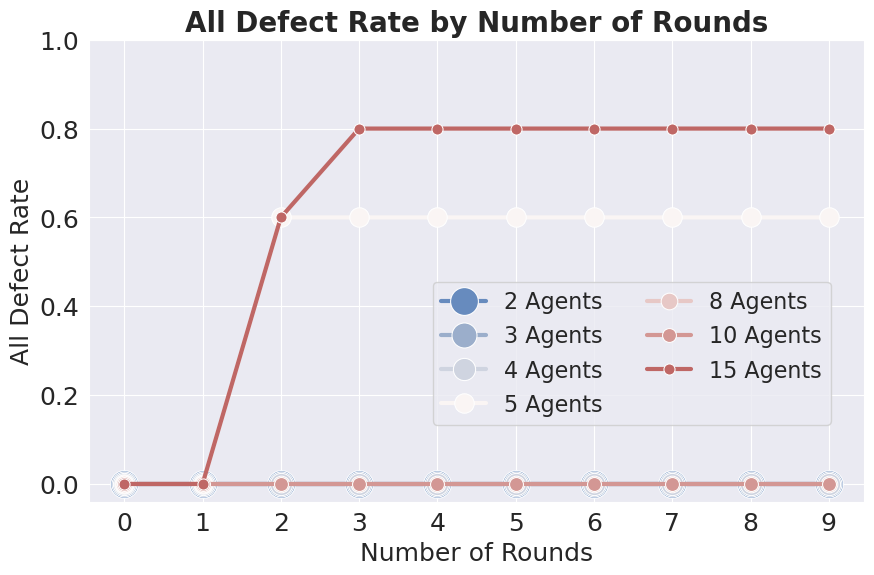

In [142]:
root_dir = "results/gpt-3.5-turbo/multiple_turn"
root_dir = "results/gpt-3.5-turbo/infinite_turn"
# root_dir = "results/gpt-4/multiple_turn"

GPT_VERSION, flag = root_dir.split("/")[-2], root_dir.split("/")[-1]
print(GPT_VERSION, flag)

 
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

all_exps = os.listdir(root_dir)

# sort by the number in the name
all_exps = sorted(all_exps, key=lambda x: int(x.split("_")[0]))

print(all_exps)
all_n_players = [m .split("_")[0] for m in all_exps]
all_defs = []
all_coops = []

# 使用seaborn绘图
sns.set_style("darkgrid")
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))

colors = sns.color_palette("vlag", n_colors=len(all_n_players))


linesizes = - np.arange(len(all_n_players))*2  +20
# sns.palplot(colors)



for n_player, exp, color, linesize in zip(all_n_players, all_exps, colors, linesizes):
    # Load data
    df = pd.read_csv(os.path.join(root_dir, exp))

    data = []
    evaluate_times = len(df)
    # print(df)
    # print('length: ', length)
    all_def_evaluations = []
    all_coop_evaluations = []
    for index, row in df.iterrows():
        # print(row)
        # for each evaluation
        

        all_def = 0
        all_coop = 0
        turn_num = len(row)
        all_def_turns = [0 for i in range(turn_num)]
        all_coop_turns = [0 for i in range(turn_num)]
        # print(turn_num)
        for turn_index in range(turn_num):
            # for each turn
            curr_turn = row.tolist()[turn_index]

            # store the flag for current turn and evaluation
            if 'cooperate' not in curr_turn:
                all_def_turns[turn_index] += 1
                # print('def count: ', all_def)
            if 'defect' not in curr_turn:
                all_coop_turns[turn_index] += 1
        all_def_evaluations.append(all_def_turns)
        all_coop_evaluations.append(all_coop_turns)

    # now we get the flags for each evaluation, each turn
    # then we calculate the average rate for each turn
    all_def_evaluations = np.array(all_def_evaluations)
    all_coop_evaluations = np.array(all_coop_evaluations)

    def_rates = all_def_evaluations.mean(0)
    coop_rates = all_coop_evaluations.mean(0)
    print(f'{n_player} ({evaluate_times} evals)| All defect: {def_rates}')
    # print(f'{n_player} ({evaluate_times} evals)| All cooperate: {coop_rates}')

    plot_flag = "All_Def"
    # plot_flag = "All_Coop"
    if plot_flag != "All_Def":
        # # 画第一条线：所有玩家合作
        sns.lineplot(x=list(range(turn_num)), y=coop_rates.tolist(), marker="o", markersize=linesize
                        , color=color, label=str(n_player) + ' Agents', linestyle='solid', linewidth=3)

    else:
        # 画第二条线：所有玩家背叛
        sns.lineplot(x=list(range(turn_num)), y=def_rates.tolist(), marker="o", markersize=linesize
                        , color=color, label=str(n_player) + ' Agents', linestyle='solid', linewidth=3)

    # print(list(range(turn_num)))
    # print(def_rates)
# 设置标题和轴标签
# plt.title("All Coop, All Def vs. Number of Agents")
plt.xlabel("Number of Rounds")
if plot_flag == "All_Def":
    plt.ylabel("All Defect Rate")
    plt.title("All Defect Rate by Number of Rounds", fontsize=20, fontweight='bold')
    if flag == "multiple_turn":
        plt.legend(loc="upper center",ncol=int (len(all_n_players) / 3), bbox_to_anchor=[0.7, 0.41], fontsize=16)  # 你可以根据需要调整图例的位置
    else:
        plt.legend(loc="upper center",ncol=int (len(all_n_players) / 3), bbox_to_anchor=[0.7, 0.5], fontsize=16)  # 你可以根据需要调整图例的位置

else:
    if flag == "multiple_turn":
        plt.legend(loc="center left",ncol=2, bbox_to_anchor=[1, 0.7])  # 你可以根据需要调整图例的位置
    else:
        plt.legend(loc="center left",ncol=2, bbox_to_anchor=[0.4, 0.7])  # 你可以根据需要调整图例的位置
    plt.ylabel("All Cooperate Rate")
    plt.title("All Cooperate Rate by Number of Rounds", fontsize=20, fontweight='bold')
    
plt.xticks(list(range(turn_num)))  # 设置x轴的刻度为agent的数量
plt.yticks(np.arange(0, 1.2, 0.2))  # 设置y轴的刻度为0.1的倍数

# 设置字体大小
plt.rcParams.update({'font.size': 18})

# 保存图形为PNG文件
plt.savefig(f"figs/{flag}/{GPT_VERSION}/{plot_flag}_vs_agents_{evaluate_times}eval.png", dpi=300, bbox_inches='tight')


# 显示图形
plt.show()
